# Adversarial Search: Playing Dots and Boxes


## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play the game Dots and Boxes:

> "Dots and Boxes is a pencil-and-paper game for two players. The game starts with an empty grid of dots. Usually two players take turns adding a single horizontal or vertical line between two unjoined adjacent dots. A player who completes the fourth side of a 1x1 box earns one point and takes another turn. A point is typically recorded by placing a mark that identifies the player in the box, such as an initial. The game ends when no more lines can be placed. The winner is the player with the most points. The board may be of any size grid." (see [Dots and Boxes on Wikipedia](https://en.wikipedia.org/wiki/Dots_and_Boxes))

You can play Dots and Boxes [here](https://www.math.ucla.edu/~tom/Games/dots&boxes.html).

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem associated with this game:

* Initial state
* Actions
* Transition model
* Test for the terminal state
* Utility for terminal states

In [ ]:
# Your code/answer goes here.

How big is the state space? Give an estimate and explain it.

In [1]:
# Your code/ answer goes here.

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [2]:
# Your code/ answer goes here.

## Task 2: Game Environment and Random Agent [30 point]

You need to think about a data structure to represent the board meaning he placed lines and who finished what box. There are many options. Let's represent the board using a simple dictionary where `n` and `m` represents the number of dots horizontaly and vertically, respectively. Everybody needs to use the same representation so we can let agents play against each other later. 

In [3]:
def empty4():
    return {
            'n': 4,  ### hoizontal dots
            'm': 4,   ### vertical dots
            1: 0,   ### number of squares for player 1
            -1: 0   ### number of squares for player 2
            }
def empty3():
    return {
            'n': 3,  ### hoizontal dots
            'm': 3,   ### vertical dots
            1: 0,   ### number of squares for player 1
            -1: 0   ### number of squares for player 2
            }
def empty2():
    return {
            'n': 2,  ### hoizontal dots
            'm': 2,   ### vertical dots
            1: 0,   ### number of squares for player 1
            -1: 0   ### number of squares for player 2
            }

def draw_line(board, orientation, row, col, player):
    """
    Place a line on an exiting board. 
    Also checks if that line closed a box and adds point to whoever scored.
       
    Parameters
    ----------
    board: dict
        the board
    orientation: str
        either 'h' or 'v' for horizontal or vertical
    row, col: int
        index of the starting dot for the line (starting with 0)
    player: str
        Either -1 or +1, representing the player adding the line
    """
    if orientation not in ['h', 'v']:
        return False
    
    if player != -1 and player != 1:
        return False
        
    if row < 0 or col < 0:
        return False
        
    if row >= (board['n']+1) + (orientation == 'v') or col >= (board['m']+1) + (orientation == 'h'):
        return False
        
    if (orientation, row, col) in board:
        return False
    
    board[(orientation, row, col)] = True
    
    # Check if the line closes a box
    line = (orientation, row, col)
    
    # Go through all cases
    if line[0] == 'h':
        # Case 1: horizontal line at bottom
        if ('v', line[1]+1, line[2]) in board and ('v', line[1]+1, line[2]+1) in board and ('h', line[1]+1, line[2]) in board:
            # Add point to player
            board[player] += 1
            # Add box ownership to player
            board[(line[1]+1, line[2])] = player
        
        # Case 2: horizontal line at top
        if ('v', line[1], line[2]) in board and ('v', line[1], line[2]+1) in board and ('h', line[1]-1, line[2]) in board:
            # Add point to player
            board[player] += 1
            # Add box ownership to player
            board[(line[1], line[2])] = player
    
    if line[0] == 'v':
        # Case 3: vertical line at left
        if ('h', line[1], line[2]) in board and ('v', line[1], line[2]+1) in board and ('h', line[1]-1, line[2]) in board:
            # Add point to player
            board[player] += 1
            # Add box ownership to player
            board[(line[1], line[2])] = player
        
        # Case 4: vertical line at right
        if ('h', line[1], line[2]-1) in board and ('v', line[1], line[2]-1) in board and ('h', line[1]-1, line[2]-1) in board:
            # Add point to player
            board[player] += 1
            # Add box ownership to player
            board[(line[1], line[2]-1)] = player
    
    return True

Write code to display the board. **Bonus point: Post your visualization code with an example output to the discussion board. The best visualization will earn you bonus participation points in this class.**

In [4]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def print_board(board):
    n = board['n']  # Rows
    m = board['m']  # Columns
    
    fig, ax = plt.subplots()
    ax.set_xlim(-0.5, m-0.5)
    ax.set_ylim(-0.5, n-0.5)
    
    # Draw dots
    for row in range(n):
        for col in range(m):
            if (row, col) in board:
                ax.scatter(row, col, s=100, marker='o', color='black')
            else:
                ax.scatter(row, col, s=100, marker='o', color='black')
     
    # Draw lines
    for line in board:
        # print(line)
        if line != 'n' and line != 'm' and line != -1 and line != 1:
            # print(line)
            if len(line) > 2:
                # Draw Horizontal line
                if line[0] == 'h':
                    l = mlines.Line2D([line[2]-1,line[2]], [line[1]-1,line[1]-1], color='black')
                    # l = mlines.Line2D([line[1],line[1]], [line[2],line[2]+1], color='black')
                    ax.add_line(l)
                # Draw Vertical line
                else:
                    l = mlines.Line2D([line[2]-1,line[2]-1], [line[1]-1,line[1]-2], color='black')
                    # l = mlines.Line2D([line[1],line[1]-1], [line[2],line[2]], color='black')
                    ax.add_line(l)
    
    # Check for boxes
    # Boxes are stored in board with (row, col) as key and player (1 or -1) as value
    # eg: board[(3, 1)] = 1 -> player 1 has a box with top left vertex at (3, 1)
    for box in board:
        if box != 'n' and box != 'm' and box != -1 and box != 1:
            if len(box) == 2:
                if board[(box[0], box[1])] == 1:
                    ax.add_patch(plt.Rectangle((box[1]-1, box[0]-2), 1, 1, color='b'))
                else:
                    ax.add_patch(plt.Rectangle((box[1]-1, box[0]-2), 1, 1, color='r'))
    
    # Print results   
    print('Results:')
    print('         -1:', board[-1])
    print('          1:', board[1])
    
    # Set up plot to start at (1, 1)
    x = []
    y = []
    for row in range(board['n']):
        # x.append(row)
        x.append(row+1)
    for col in range(board['m']):
        # y.append(col)
        y.append(col+1)
    default_x_ticks = range(len(x))
    plt.xticks(default_x_ticks, x)
    default_y_ticks = range(len(y))
    plt.yticks(default_y_ticks, y)
    
    plt.show()

Implement helper functions for:

* The transition model $result(s, a)$.
* The utility function $utility(s)$.
* Check for terminal states $terminal(s)$.
* A check for available actions in each state $actions(s)$.

__Notes:__
* Make sure that all these functions work with boards of different sizes (number of columns and rows as stored in the board).
* The result function evaluates if the player closed a box and needs to store that information on the board. Add elements of the form `(row,col): player` to the board dictionary. `row` and `col` are the coordinates for the box and `player` is +1 or -1 representing the player. For example `(0,0): -1` means that the top-left box belongs to the other player. 

Results:
         -1: 0
          1: 0


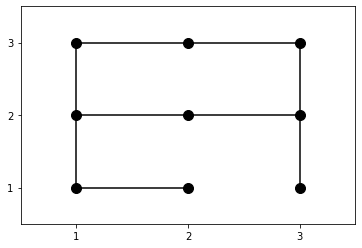

In [5]:
test1 = empty3()
draw_line(test1, 'h', 3, 1, 1)
draw_line(test1, 'h', 3, 2, 1)
draw_line(test1, 'h', 2, 1, 1)
draw_line(test1, 'h', 2, 2, 1)
draw_line(test1, 'h', 1, 1, 1)
draw_line(test1, 'v', 3, 1, 1)
draw_line(test1, 'v', 2, 1, 1)
# draw_line(test1, 'v', 2, 2, -1)
draw_line(test1, 'v', 2, 3, 1)
# draw_line(test1, 'v', 3, 2, 1)
draw_line(test1, 'v', 3, 3, 1)
# draw_line(test1, 'h', 1, 2, 1)
print_board(test1)

In [6]:
# actions(test1)

Results:
         -1: 5
          1: 4


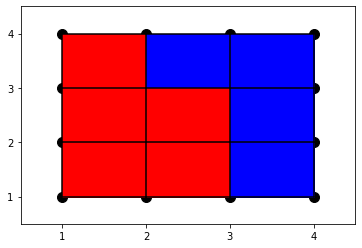

In [7]:
test5 = empty4()
draw_line(test5, "h", 4, 1, -1)
draw_line(test5, "h", 4, 2, -1)
draw_line(test5, "h", 4, 3, -1)
draw_line(test5, "h", 3, 1, -1)
draw_line(test5, "h", 3, 3, -1)
draw_line(test5, "h", 2, 1, -1)
draw_line(test5, "h", 1, 1, -1)
draw_line(test5, "h", 1, 2, 1)
draw_line(test5, "h", 1, 3, 1)
draw_line(test5, "v", 4, 2, 1)
draw_line(test5, "v", 4, 3, 1)
draw_line(test5, "v", 4, 4, 1)
draw_line(test5, "v", 3, 1, -1)
draw_line(test5, "v", 3, 4, -1)
draw_line(test5, "v", 2, 1, -1)
draw_line(test5, "v", 2, 2, -1)
draw_line(test5, "v", 2, 3, 1)
draw_line(test5, "v", 2, 4, -1)
draw_line(test5, "v", 4, 1, -1)
draw_line(test5, "v", 3, 2, -1)
draw_line(test5, "v", 3, 3, 1)
draw_line(test5, "h", 3, 2, 1)
draw_line(test5, "h", 2, 2, -1)
draw_line(test5, 'h', 2, 3, 1)
print_board(test5)

In [8]:
# actions(test5)

In [9]:
def closes_box(state, action, player=1):
    """
    Check if the action will close a box, return True if it did.
    
    Parameters
    ----------
    board: dict
        The board
    action: list
        List describing the action
        action[0]: orientation - 'h' or 'v'
        action[1]: row
        action[2]: column
    """
    
    state = state.copy()
    
    # Line will not close a box if it is already drawn
    if action in state:
        return False
    
    draw_line(state, action[0], action[1], action[2], player)
    
    if action[0] == 'h':
        # Case 1: horizontal line at bottom
        if ('v', action[1]+1, action[2]) in state and ('v', action[1]+1, action[2]+1) in state and ('h', action[1]+1, action[2]) in state:
            # print(action, ' Case 1')
            return True
        # Case 2: horizontal line at top
        if ('v', action[1], action[2]) in state and ('v', action[1], action[2]+1) in state and ('h', action[1]-1, action[2]) in state:
            # print(action, ' Case 2')
            return True
    if action[0] == 'v':
        # Case 3: vertical line at left
        if ('h', action[1], action[2]) in state and ('v', action[1], action[2]+1) in state and ('h', action[1]-1, action[2]) in state:
            # print(action, ' Case 3')
            return True
        # Case 4: vertical line at right
        if ('h', action[1], action[2]-1) in state and ('v', action[1], action[2]-1) in state and ('h', action[1]-1, action[2]-1) in state:
            # print(action, ' Case 4')
            return True
    
    return False

In [10]:
def closed_box(state, action, player=1):
    """
    Check if the action has closed a box, return True if it did.
    
    Parameters
    ----------
    board: dict
        The board
    action: list
        List describing the action
        action[0]: orientation - 'h' or 'v'
        action[1]: row
        action[2]: column
    """
    
    if action is None:
        return False
    
    state = state.copy()
    
    # Line will not close a box if it is not already drawn
    if action not in state:
        return False
    
    # draw_line(state, action[0], action[1], action[2], player)
    
    if action[0] == 'h':
        # Case 1: horizontal line at bottom
        if ('v', action[1]+1, action[2]) in state and ('v', action[1]+1, action[2]+1) in state and ('h', action[1]+1, action[2]) in state:
            # print(action, ' Case 1')
            return True
        # Case 2: horizontal line at top
        if ('v', action[1], action[2]) in state and ('v', action[1], action[2]+1) in state and ('h', action[1]-1, action[2]) in state:
            # print(action, ' Case 2')
            return True
    if action[0] == 'v':
        # Case 3: vertical line at left
        if ('h', action[1], action[2]) in state and ('v', action[1], action[2]+1) in state and ('h', action[1]-1, action[2]) in state:
            # print(action, ' Case 3')
            return True
        # Case 4: vertical line at right
        if ('h', action[1], action[2]-1) in state and ('v', action[1], action[2]-1) in state and ('h', action[1]-1, action[2]-1) in state:
            # print(action, ' Case 4')
            return True
    
    return False

In [11]:
def check_win(state, player=1):
    '''
    Checks the winner of the state received.
       
    Parameters
    ----------
    state: dict
        the board
    player: int
        -1 or +1 representing the player adding a line
    Returns a string for win, draw, or loss
    '''
        
    playerPoints = 0
    opponentPoints = 0
    for dots in state:
        if dots != 'n' and dots != 'm' and dots != -1 and dots != 1:
            if len(dots) == 2:
                if state[dots] == player:
                    playerPoints += 1
                elif state[dots] == -player:
                    opponentPoints += 1
    
    if (playerPoints + opponentPoints) < ((state['n']-1)*(state['m']-1)):
        return 'next'        
    else:
        if playerPoints > opponentPoints:
            return 'win'
        elif playerPoints < opponentPoints:
            return 'loss'
        elif playerPoints == opponentPoints:
            return 'draw'

In [12]:
def actions(state):
    '''
    Returns all possible moves available on the state received.
       
    Parameters
    ----------
    state: dict
        the board
    Returns a list
    '''
    
    if terminal(state):
        return []
    
    # Get a list of all possible actions
    actions = []
    dots = state['n']*state['m']
    
    # Check all dots and orientations
    for row in range(state['n']):
        for col in range(state['m']):
            if ('v', row+1, col+1) not in state and (row+1) > 1:
                actions.append(('v', row+1, col+1))
            if ('h', row+1, col+1) not in state and (col+1) < (state['m']):
                # print('Column: ', col+1, ' M: ', state['m'])
                actions.append(('h', row+1, col+1))
    return actions

In [13]:
def result(state, player, action):
    """
    Add move to the board. Calls the draw_line function.
    
    Parameters
    ----------
    state: dict
        current state
    player: int
        player number
    action: list
        List describing the action
        action[0]: orientation - 'h' or 'v'
        action[1]: row
        action[2]: column
    """
    
    # draw_line(board, orientation, row, col, player)
    draw_line(state, action[0], action[1], action[2], player)
    
    return state

In [14]:
def utility(state, player=1):
    goal = check_win(state, player)        
    if goal == 'win': return +1 
    if goal == 'draw': return 0  
    if goal == 'loss': return -1  # loss is failure
    return None # continue

In [15]:
def terminal(state):
    return check_win(state) != 'next'

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = None): ...`

The argument `player` is used for agents that do not store what side they are playing. The value passed on by the environment should be 1 ot -1 for playerred and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [16]:
import numpy as np

def random_player(state, player=None):
    '''
    Random agent. Returns a random action from a list of all possible actions.
    
    Parameters
    ----------
    board: dict
        The board
    player: int
        Player making the move
    '''
    moves = actions(state)
    if len(moves) == 0:
        return None
    
    index = np.random.choice(len(moves))
    return moves[index]

### Environment

In [17]:
def play(agentOne, agentOpponent, N=1, verbose=0):
    """Play N games. agentOne and agentOpponent are the players' agent functions."""
    
    results = {-1: 0, 1: 0, 'draw': 0}
    
    # Play N games
    for i in range(N):
        # Initiliaze empty board
        board = empty4()
        # Initialize player and its agent
        player, agent = 1, agentOne
        # Reset change player boolean
        change = True
        
        # Game loop
        while True:
            # If there are no actions left, the game is over
            if actions(board) == []:
                # Check the winner
                win = check_win(board, player)
                # Add to counters
                if win == 'win':
                    results[player] += 1
                elif win == 'loss':
                    results[-player] += 1
                else:
                    results['draw'] += 1
                if verbose>0: print_board(board)
                break
            
            # Get the action the agent wants to play
            action = agent(board, player)
            
            # If the action will close a box, player plays again
            if closes_box(board, action):
                change = False
            # If it doesn't, it is the opponent's turn
            else:
                change = True
            
            # Play the action
            board = result(board, player, action)  
            
            if change:
                # Switch player
                player = -player
                # Switch agent
                if agent == agentOne:
                    agent = agentOpponent
                elif agent == agentOpponent:
                    agent = agentOne
        
    return results

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [18]:
oneAvg = 0
opponentAvg = 0
drawAvg = 0

for i in range(10):
    curr = play(random_player, random_player, 1000)
    oneAvg += curr[1]
    opponentAvg += curr[-1]
    drawAvg += curr['draw']

oneAvg = oneAvg/10
opponentAvg = opponentAvg/10
drawAvg = drawAvg/10
print('1:', oneAvg)
print('-1:', opponentAvg)
print('draw:', drawAvg)
print('Proportion for One: ', oneAvg/(oneAvg+opponentAvg+drawAvg))
print('Proportion for Opponent: ', opponentAvg/(oneAvg+opponentAvg+drawAvg))

1: 497.4
-1: 502.6
draw: 0.0
Proportion for One:  0.49739999999999995
Proportion for Opponent:  0.5026


## Task 3: Minimax Search with Alpha-Beta Pruning [30 points]

### Implement the search starting.

Implement the search starting from a given board and specifying the player and put it into an agent function.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Notes:__ 
* Make sure that all your agent functions have a signature consistent with the random agent above.
* The search space for larger board may be too large. You can experiment with smaller boards.

In [19]:
# DEBUG = 1
# DEPTH = 0

# def alpha_beta_search(state, player=1):
#     global DEBUG, DEPTH
#     state = state.copy()
    
#     val, move = max_value(state, player, -np.inf, np.inf)
    
#     return {'move': move, 'value': val}

# def max_value(state, player, alpha, beta):
#     global DEBUG, DEPTH
#     if DEBUG >= 1: print('Depth: ', DEPTH)
    
#     # If the state is terminal, return the utility value to the player
#     if terminal(state):
#         return utility(state, player), None
    
#     v = -np.inf
#     best_move = None
    
#     for action in actions(state):
#         v2, action2 = min_value(result(state, player, action), -player, alpha, beta)
#         print('Max: ', v2)
#         if v2 > v:
#             v = v2
#             best_move = action
#             alpha = max(alpha, v)
#         if v >= beta:
#             return v, best_move
#         alpha = max(alpha, v)
        
#     DEPTH += 1

#     return v, best_move

# def min_value(state, player, alpha, beta):
#     global DEBUG, DEPTH
#     if DEBUG >= 1: print('Depth: ', DEPTH)
    
#     # If the state is terminal, return the utility value to the player
#     if terminal(state):
#         return utility(state, -player), None
    
#     v = np.inf
#     best_move = None
    
#     for action in actions(state):
#         v2, action2 = max_value(result(state, player, action), -player, alpha, beta)
#         print('Min: ', v2)
#         if v2 < v:
#             v = v2
#             best_move = action
#             beta = min(beta, v)
#         if v <= alpha:
#             return v, best_move
#         beta = min(beta, v)
    
#     DEPTH += 1
    
#     return v, best_move

In [60]:
# Attempt at checking if player should play again
DEBUG = 0
DEPTH = 0

def alpha_beta_search(state, player=1):
    global DEBUG, DEPTH
    state = state.copy()
    
    val, move = max_value(state, player, -np.inf, np.inf)
    
    return {'move': move, 'value': val}

def max_value(state, player, alpha, beta, prevAction=None):
    global DEBUG, DEPTH
    if DEBUG >= 1: print('Depth: ', DEPTH)
    
    # If the state is terminal, return the utility value to the player
    if terminal(state):
        return utility(state, player), None
    
    v = -np.inf
    best_move = None
    
    if closed_box(state, prevAction) or prevAction is None:
        v2, action2 = min_value(state, -player, alpha, beta, None)
    else:
        for action in actions(state):
            v2, action2 = min_value(result(state, player, action), player, alpha, beta, action)
            print('Max: ', v2)
            if v2 > v:
                v = v2
                best_move = action
                alpha = max(alpha, v)
            if v >= beta:
                return v, best_move
            alpha = max(alpha, v)
        
    DEPTH += 1

    return v, best_move

def min_value(state, player, alpha, beta, prevAction=None):
    global DEBUG, DEPTH
    if DEBUG >= 1: print('Depth: ', DEPTH)
    
    # If the state is terminal, return the utility value to the player
    if terminal(state):
        return utility(state, player), None
    
    v = np.inf
    best_move = None
    
    if closed_box(state, prevAction) or prevAction is None:
        v2, action2 = max_value(state, -player, alpha, beta, None)
    else:
        for action in actions(state):
            v2, action2 = max_value(result(state, -player, action), player, alpha, beta, action)
            print('Min: ', v2)
            if v2 < v:
                v = v2
                best_move = action
                beta = min(beta, v)
            if v <= alpha:
                return v, best_move
            beta = min(beta, v)
        
    DEPTH += 1
    
    return v, best_move

In [21]:
# # Attempt 2
# def alpha_beta_search(state, player=1):
#     global DEBUG, DEPTH
#     state = state.copy()
    
#     val, move = max_value(state, player, -np.inf, np.inf)
    
#     return {'move': move, 'value': val}

# def max_value(state, player, alpha, beta):
#     global DEBUG, DEPTH
#     if DEBUG >= 1: print('Depth: ', DEPTH)
    
#     # If the state is terminal, return the utility value to the player
#     if terminal(state):
#         return utility(state, player), None
    
#     v = -np.inf
#     best_move = None
    
#     for action in actions(state):
#         v2, action2 = min_value(result(state, player, action), -player, alpha, beta)
#         print('Max: ', v2)
#         if v2 > v:
#             v = v2
#             best_move = action
#             alpha = max(alpha, v)
#         if v >= beta:
#             return v, best_move
#         alpha = max(alpha, v)
        
#     DEPTH += 1

#     return v, best_move

# def min_value(state, player, alpha, beta):
#     global DEBUG, DEPTH
#     if DEBUG >= 1: print('Depth: ', DEPTH)
    
#     # If the state is terminal, return the utility value to the player
#     if terminal(state):
#         return utility(state, player), None
    
#     v = np.inf
#     best_move = None
    
#     for action in actions(state):
#         v2, action2 = max_value(result(state, player, action), -player, alpha, beta)
#         print('Min: ', v2)
#         if v2 < v:
#             v = v2
#             best_move = action
#             beta = min(beta, v)
#         if v <= alpha:
#             return v, best_move
#         beta = min(beta, v)
    
#     DEPTH += 1
    
#     return v, best_move

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

Results:
         -1: 1
          1: 1


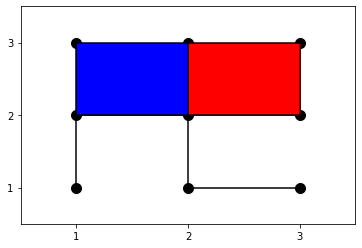

In [22]:
test3 = empty3()
draw_line(test3, 'h', 3, 1, -1)
draw_line(test3, 'h', 3, 2, 1)
draw_line(test3, 'h', 2, 1, -1)
draw_line(test3, 'h', 2, 2, 1)
draw_line(test3, 'h', 1, 2, -1)
draw_line(test3, 'v', 3, 2, 1)
draw_line(test3, 'v', 2, 2, -1)
draw_line(test3, 'v', 3, 1, 1)
draw_line(test3, 'v', 3, 3, -1)
draw_line(test3, 'v', 2, 1, 1)

print_board(test3)

Results:
         -1: 3
          1: 2


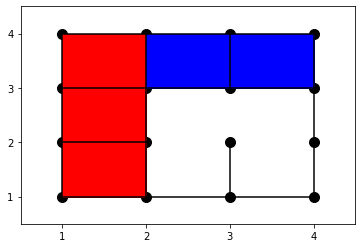

In [23]:
test5 = empty4()
draw_line(test5, "h", 4, 1, -1)
draw_line(test5, "h", 4, 2, -1)
draw_line(test5, "h", 4, 3, -1)
draw_line(test5, "h", 3, 1, -1)
draw_line(test5, "h", 3, 3, -1)
draw_line(test5, "h", 2, 1, -1)
draw_line(test5, "h", 1, 1, -1)
draw_line(test5, "h", 1, 2, 1)
draw_line(test5, "h", 1, 3, 1)
draw_line(test5, "v", 4, 2, 1)
draw_line(test5, "v", 4, 3, 1)
draw_line(test5, "v", 4, 4, 1)
draw_line(test5, "v", 3, 1, -1)
draw_line(test5, "v", 3, 4, -1)
draw_line(test5, "v", 2, 1, -1)
draw_line(test5, "v", 2, 2, -1)
draw_line(test5, "v", 2, 3, 1)
draw_line(test5, "v", 2, 4, -1)
draw_line(test5, "v", 4, 1, -1)
draw_line(test5, "v", 3, 2, -1)
# draw_line(test5, "v", 3, 3, 1)
draw_line(test5, "h", 3, 2, 1)
# draw_line(test5, "h", 2, 2, -1)
# draw_line(test5, 'h', 2, 3, 1)
print_board(test5)

In [ ]:
# DEBUG = 1
# DEPTH = 0
alpha_beta_search(test5)

How long does it take to make a move? Start with a smaller board make the board larger. What is the largest board you can solve?

In [25]:
# Your code/ answer goes here.

### Move ordering

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [26]:
# Your code/ answer goes here.

### The first few moves

Start with an empty board. This is the worst case scenario for minimax search with alpha-beta pruning since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do? 

In [27]:
# Your code/ answer goes here.

### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [28]:
# Your code/ answer goes here.

## Task 4: Heuristic Alpha-Beta Tree Search [30 points] 

### Heuristic evaluation function

Define and implement a heuristic evaluation function.

In [29]:
# Your code/ answer goes here.

### Cutting off search 

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [30]:
# Your code/ answer goes here.

Experiment with the same manually created boards as above to check if the agent spots winning opportunities.

In [31]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [32]:
# Your code/ answer goes here.

### Playtime

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [33]:
# Your code/ answer goes here.

## Tournament task [+1 to 5% bonus on your course grade; will be assigned separately]

Find another student and let your best agent play against the other student's best player. You are allowed to use any improvements you like as long as you code it yourself. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search (see [tic-tac-toe-example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_pure_monte_carlo_search.ipynb)) and investigate how this search performs on the test boards that you have used above. 

In [34]:
# Your code/ answer goes here.

### Best First Move

How would you determine what the best first move for a standard board ($5 \times 5$) is? You can use Pure Monte Carlo Search or any algorithms that you have implemented above.

In [35]:
# Your code/ answer goes here.